## Group SBS, Sheet 06, Exercise 01

### Conributors:

* Sreyas Sony (sony@uni-potsdam.de),
* Sanika Nair (nair@uni-potsdam.de),
* Binoy Chacko (chacko@uni-potsdam.de),
* Dinesh Kumar (kumar@uni-potsdam.de) 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

A Linear Regression model is given as $\mathbf{y}= \mathbf{X}\beta + \epsilon_i$ for $i=1, 2, 3,....$ where $\epsilon_i\sim\mathcal{}(0,\sigma^2\mathbf{I}_n)$ and iid. $\mathbf{y}$ is of size $n\times 1$ and $\mathbf{X}$ is of size $n\times p $ Thus $\hat{\beta}$ of ML estimator and LS-estimator is given by the formula, $\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$ where $\mathbf{X}$ is of rank $p+1$. 

In [2]:
names = ['X1', 'X2', 'X3', 'X4', 'X5']
X = pd.read_csv("X_potential_drivers.txt", header=None, names=names)
# adding X0
X['X0'] = np.ones(len(X))
# rearranging
X = X[['X0','X1', 'X2', 'X3', 'X4', 'X5']]
# converting to complex datatype
X['X4'] = X['X4'].str.replace('i','j').apply(lambda x: np.complex(x))
# removing the infinity value from the data assuming that it is an outlier
X.drop(100, inplace=True)

In [3]:
X_start = X.to_numpy()
# imaginary value
X_imag = X_start[:, 4].imag
# seperating real and imaginary part of X4 and adding X4imag as a 
# as a new predictor variable
X = np.hstack((X_start.real, X_imag.reshape(len(X_start),1)))

Y = np.loadtxt("Y_snow.txt")
# deleting the y label for the record with infinity value in X
Y = np.delete(Y, [100], axis=0)

#
### Exploratory Data Analysis

In [4]:
def plot_pred_response():
    fig, axs = plt.subplots(1, 6, figsize=(12,5), sharey=True)
    axs = axs.flat
    for i, ax in enumerate(axs[:-1]):
        ax.scatter(X[:,i+1], Y, s=50, color='#2171b5', ec="white", label='real')      
        ax.set_xlabel(f"$X_{i+1}$", fontsize=14)
        ax.legend(frameon=False)
    axs[-1].scatter(X[:,-1], Y, s=50, color='#e41a1c', ec="white", label='$X_4$ imag')
    axs[-1].legend(frameon=False)
    axs[-1].set_xlabel(f"$X_{4}$", fontsize=14)
    axs[0].set_ylabel("$Y$", fontsize=14)
    fig.tight_layout()

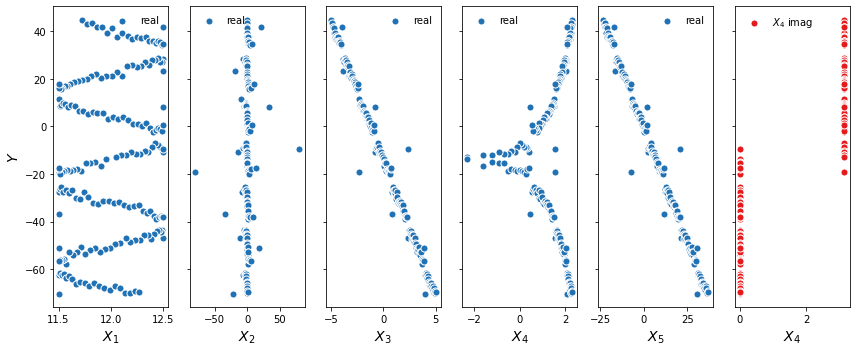

In [5]:
plot_pred_response()

* There  is no linear relationship between $X_1$ and  $Y$. The relationship is a sinusoidal wave.
* There  is no linear relationship between $X_2$ and  $Y$. The relationship follows a sawtooth curve
* There  exists a  linear relationship between $X_3$ and  $Y$, but they are negatively correlated
* There  is no linear relationship between $X_4$ and  $Y$. $Y$ diverges to $-\infty$ and $\infty$ when $X_4$ increases.
* There  exist a  linear relationship between $X_3$ and  $Y$, but they are negatively correlated. Also it looks like $X_5$ and $X_3$ are positively correlated. The values of $X_5$ are upscaled in comparison to $X_3$
* Imaginary part of $X_4$ predictor is a binary variable


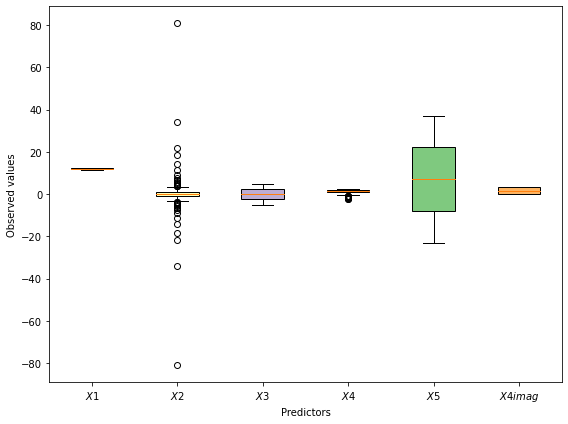

In [6]:
names_ = names[:]
names_.append("X4 imag")

def plot_outliers():
    fig, axs = plt.subplots(figsize=(8,6), sharey=True)
    bplot = axs.boxplot(X[:,1:].real, patch_artist=True, labels=[f'${name}$' for name in names_])
    colors = ["#8dd3c7", "#ffffb3", "#beaed4", "#fb8072", "#7fc97f", "#fdb462"]
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    axs.set_xlabel('Predictors')
    axs.set_ylabel('Observed values')
    fig.tight_layout()

plot_outliers()

* Predictors $X_2$  and $X_4$ is having outliers, this is clear from the above exploratory graph as well.

#### Correlation  between predictors and also with response
<center>
$Corr(X,Y) = \dfrac{E[(X-E[X])(Y-E[Y])]}{\sqrt{Var(X)Var(Y)}}$
    <center>

In [7]:
# correlation matrix
corr_mat = np.hstack((X[:,1:],Y.reshape(len(Y),1)))

def correlation_matrix(corr_mat):  
    # deviations from mean
    x_dev = (corr_mat - np.mean(corr_mat, axis = 0))
    # square of deviations
    x_dev_sqr = np.sum(x_dev**2, axis=0).reshape(corr_mat.shape[1], 1)
    numerator = x_dev.T@x_dev
    denominator = np.sqrt(x_dev_sqr @ x_dev_sqr.T)
    return numerator/denominator

In [8]:
def plot_heatmap(corr, names):
    """parts of code from matplotlib page"""
    len_names = len(names)
    fig, ax = plt.subplots(figsize=(5.2,5.2))
    ax.imshow(corr)
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len_names))
    ax.set_yticks(np.arange(len_names))
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    # Loop over data dimensions and create text annotations.
    for i in range(len_names):
        for j in range(len_names):
            text = ax.text(j, i, np.round(corr[i, j],2),
                           ha="center", va="center", color="w")
        ax.set_title("Correlation matrix between predictors and response")
    fig.tight_layout()
    plt.show()


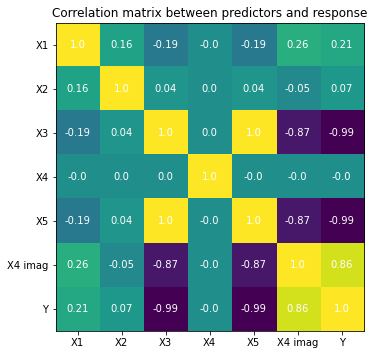

In [9]:
name_pred_resp = names_[:]
corr = correlation_matrix(corr_mat)
name_pred_resp.append("Y")
plot_heatmap(corr, name_pred_resp)

* As expected from the figures, there is a perfect correlation between $X_3$ and $X_5$. Otherwise, no other predictor variables show strong correlation with each other
* There is almost a perfect negative correlation between $X_3$ and $Y$ and $X_5$ and $Y$. From this we can draw the conclusion that $X_3$ or $X_5$ will be among the important variables in  model building.
* There is no correlation between the real part of $X_4$ and $Y$ or with other predictor variables

In [10]:
class MultipleRegression():
    
    def __init__(self, scale=True):
        self.scale = scale
        self.X = None
        self.Y = None

    def scale_data(self, X):
        self.X = X
        if self.scale:
            dev = X - np.mean(X, axis=0)
            std = np.std(X, axis = 0)
            np.true_divide(dev, std, out=self.X, where=std != 0)
                    
    def fit_predict(self, X, Y):
        self.Y = Y
        self.X = X
        try:
            coeff = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.Y
            y_hat = self.X @ coeff
            return [coeff, y_hat]
        except np.linalg.LinAlgError:
            print("Singular matrix")
        
    def mse(self, predictions):
        return np.mean((self.Y - predictions)**2)

    def r_squared(self, predictions):
        muY = np.mean(self.Y)
        return np.sum((predictions - muY)**2)/np.sum((self.Y - muY)**2)
    
    def adj_r_squared(self, X, rsquared):
        n = len(self.X)
        p = self.X.shape[1]
        return 1 - (((n-1)/(n-p)) *(1-rsquared))
       

### Approach 1

####  Best subset selection method based on $R^2$ adjusted value

In [11]:
class BestSubsetSelection(MultipleRegression):
        
    def run_subset_selection(self, p, X, Y):
        self.models = {}
        # scaling the data to deal with the outliers
        self.scale_data(X)
        X0 = self.X[:, 0].reshape(-1,1)
        for i in range(1, p):
            combs = combinations(np.arange(1, p), i)
            for j in combs:
                X_sub = np.hstack((X0, X[:, j]))
                if isinstance(self.fit_predict(X_sub, Y), list):
                    coeff, pred = self.fit_predict(X_sub, Y)
                    rsquared = self.r_squared(pred)
                    self.models[(0, j)] = [self.mse(pred), rsquared, self.adj_r_squared(X_sub, rsquared)]
    
    
    def select_best_models(self, threshold):
        self.best_models = {}
        for key, values in self.models.items():
            if values[-1] > threshold and values[-1] < 1 :
                self.best_models[key] = [round(value, 4) for value in values]
        
    

In [12]:
bss = BestSubsetSelection()
bss.run_subset_selection(p=7, X=X, Y=Y)

Singular matrix


In [13]:
bss.select_best_models(threshold=0.9)
print(f"Predictors: [MSE, R2, corrected R2]")
print("-----------------------------------")
bm = bss.best_models
for key, value in bm.items():
    # filtering based on MSE
    if value[0] < 1:
        print(key, value)

Predictors: [MSE, R2, corrected R2]
-----------------------------------
(0, (2, 3)) [0.917, 0.9992, 0.9992]
(0, (2, 5)) [0.917, 0.9992, 0.9992]
(0, (1, 2, 3)) [0.9122, 0.9992, 0.9992]
(0, (1, 2, 5)) [0.9122, 0.9992, 0.9992]
(0, (2, 3, 4)) [0.9169, 0.9992, 0.9992]
(0, (2, 3, 6)) [0.9168, 0.9992, 0.9992]
(0, (2, 4, 5)) [0.9169, 0.9992, 0.9992]
(0, (2, 5, 6)) [0.9168, 0.9992, 0.9992]
(0, (1, 2, 3, 4)) [0.9121, 0.9992, 0.9992]
(0, (1, 2, 3, 6)) [0.9122, 0.9992, 0.9992]
(0, (1, 2, 4, 5)) [0.9121, 0.9992, 0.9992]
(0, (1, 2, 5, 6)) [0.9122, 0.9992, 0.9992]
(0, (2, 3, 4, 6)) [0.9167, 0.9992, 0.9992]
(0, (2, 4, 5, 6)) [0.9167, 0.9992, 0.9992]
(0, (1, 2, 3, 4, 6)) [0.9121, 0.9992, 0.9992]
(0, (1, 2, 4, 5, 6)) [0.9121, 0.9992, 0.9992]



 From the subset selection method, the model with the least corrected $R^2$ is selected as the best model. Based on this criteria, we had 32 models. Therefore we looked into the MSE as the next parameter to select the model keeping corrected $R^2$ fixed. After this filtering criteria we had 16 models to choose from. Therefore, we choose the model with least number of predictors as adding more variables is not considerably decreasing the MSE error. Based on this the best predictor variables for our model are the following.

* model 1: $X_0$, $X_2$,  $X_3$
 * model 2: $X_0$, $X_2$,  $X_5$


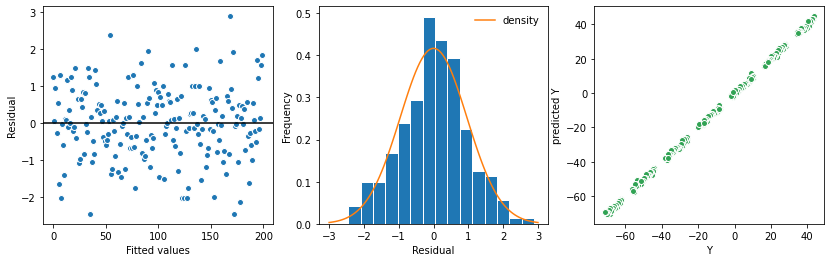

In [14]:
from scipy.stats import norm
M_reg = MultipleRegression()
# coefficients and predictions of the best model
coeff, y_hat = M_reg.fit_predict(X[:, [0, 2, 3]], Y)
residual = Y - y_hat


fig, axs = plt.subplots(1, 3, figsize=(14,4))
axs[0].scatter(np.arange(len(Y)), residual, ec='white')
axs[0].axhline(0, color='black');
axs[0].set_ylabel("Residual")
axs[0].set_xlabel("Fitted values")
axs[1].hist(residual, bins=15, ec='white', density=True);
axs[1].set_xlabel("Residual")
axs[1].set_ylabel("Frequency")
x = np.linspace(-3, 3, 100)
axs[1].plot(x, norm.pdf(x, np.mean(residual), np.std(residual)), label='density');
axs[1].legend(frameon=False)
axs[2].scatter(y_hat, Y, color= '#31a354', ec='white')
axs[2].set_xlabel("Y")
axs[2].set_ylabel("predicted Y")
plt.show()

 Residual plots are a useful graphical tool for identifying non-linearity.  Ideally, the residual plot will show no fitted discernible pattern. The presence of a pattern may indicate a problem with some aspect of the linear model [1]. From the figures above we can see that there is no distinguishable pattern from the residual plot, which is a good sign that the model is following linearity assumption. The predicted values of Y and Y also follows a linear relationship, which also points towards a well fitted model.



#
### Approach 2

#### Best model selection using cross validation approach

Compute the  the cross-validation error for each model and then select the model for which the resulting estimated test error is smallest. 


In [15]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score    

In [16]:
class CrossValidation():
    
    def run_cross_validation_subset(self, p, X, Y):
            self.cross_models = {}
            for i in range(1, p):
                combs = combinations(np.arange(p), i)
                for j in combs:
                    X_sub = X[:, j]
                    folds = KFold(n_splits = 5, shuffle = True, random_state = 100) 
                    LR = LinearRegression(fit_intercept=False) 
                    scores = cross_val_score(LR, X_sub, Y, scoring='neg_root_mean_squared_error', cv=folds)
                    rmse_scores = np.sqrt(np.mean(-scores))
                    self.cross_models[j] = rmse_scores
    
    def select_best_cross_models(self, threshold):
        self.best_cross_models = {}
        for key, values in self.cross_models.items():
            if values  < threshold:
                self.best_cross_models[key] = round(values, 5) 

In [17]:
CV = CrossValidation()
CV.run_cross_validation_subset(X=X, Y=Y, p=X.shape[1]-1)
CV.select_best_cross_models(threshold=1)

In [18]:
CV.best_cross_models

{(0, 2, 3): 0.98445,
 (0, 2, 5): 0.98445,
 (0, 1, 2, 3): 0.98356,
 (0, 1, 2, 5): 0.98356,
 (0, 2, 3, 4): 0.98529,
 (0, 2, 3, 5): 0.98445,
 (0, 2, 4, 5): 0.98529,
 (0, 1, 2, 3, 4): 0.98421,
 (0, 1, 2, 3, 5): 0.98356,
 (0, 1, 2, 4, 5): 0.98421,
 (0, 2, 3, 4, 5): 0.98529}

#
From the best cross validation models, the model with the least prediction error on the test data set is taken as the best model. Based on this criteria, we have three models with the least rmse value 

* model 1: $X_0$, $X_1$,  $X_2$,  $X_3$
 * model 2: $X_0$, $X_1$,  $X_2$,  $X_5$
* model 3: $X_0$,  $X_1$,  $X_2$,  $X_3$,  $X_5$


However keeping $X_3$ and $X_5$ together in the model is not necessary as they are perfectly correlated, and not giving any additional information on the dataset fitted. Therefore, the best models are model 1 and model 2.

#
### Approach 3

#### Backward selection approach

We start with all variables in the model, and backward remove the variable with the largest p-value—that is, the variable  selection
that is the least statistically significant. The new (p − 1)-variable model is fit, and the variable with the largest p-value is removed. This
procedure continues until a stopping rule is reached. For instance, we may stop when all remaining variables have a p-value below some
threshold [1]. Here we chose the popular threshold, alpha = 0.05.

In [19]:
import statsmodels.api as sm

def backward_selection(X, Y, alpha=0.05, col_names=list(range(6))):
    mod = sm.OLS(Y,X)
    fit_ = mod.fit()
    p_values = fit_.summary2().tables[1]['P>|t|']
    X_copy = X.copy()
    if np.any(p_values > 0.05):
        idx = np.argmax(p_values)
        if idx in col_names:
            col_names.remove(idx)
        X_copy = np.delete(X_copy, idx, axis=1)
        return backward_selection(X_copy, Y, col_names)
    return col_names, fit_.summary()

In [20]:
cols, summary = backward_selection(X, Y)
print("Columns", cols)
print("Summary", summary)

Columns [0, 2, 3, 5]
Summary                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.212e+05
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.99e-305
Time:                        09:42:20   Log-Likelihood:                -275.13
No. Observations:                 200   AIC:                             556.3
Df Residuals:                     197   BIC:                             566.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9013  


* The backward selection method is useful for selecting the important features. According to this method $X_0$, $X_2$,  $X_3$,  $X_5$ are the most important variables. In this selection procedure we used the significance level, alpha = 0.05. If we want to create a model, we could use  a model with $X_0$, $X_2$,  $X_3$ as features or  a model with  $X_0$, $X_2$,  $X_5$ as features, since $X_3$ and $X_5$ are perfectly correlated, we could use one of them in the model.

* From all the three approaches we followed, we can come to the conclusion that the best model can be build using the predictors $X_0$, $X_2$,  $X_3$  or $X_0$, $X_2$,  $X_5$

### Coefficients of best model

In [21]:
mr = MultipleRegression()
coeff, pred = mr.fit_predict(X[:,[0, 2,3]], Y)
r2 = mr.r_squared(pred)
r2_corrected = mr.adj_r_squared(X[:,[0, 2,3]], rsquared=r2)
print(f"Coefficients: b0:{coeff[0]}, b2:{coeff[1]},  b3:{coeff[2]}")
print("r2:", r2)
print("Corrected r2:", r2_corrected)

Coefficients: b0:-13.9012797, b2:3.89047454388653,  b3:-33.53378235959251
r2: 0.9991878139546398
Corrected r2: 0.9991795684110322


# References

[1]. Hastie, Tibshirani, and Friedman. The Elements of Statistical Learning (ESL) 